# データの読み込み

In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
import statistics

In [46]:
#CSVread
df = pd.read_csv('housing.csv')

In [47]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [48]:
import seaborn as sns

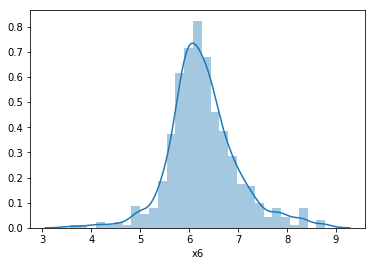

In [49]:
sns.distplot(df['x6'])

# 外れ値除去（3σ法）

In [56]:
col = 'x6'

In [58]:
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [59]:
mean[col]

6.284634387351788

In [61]:
#標準偏差(Standard deviation)
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [62]:
sigma[col]

0.7026171434153234

In [63]:
low = mean[col] - 3 * sigma[col]
low

4.176782957105817

In [66]:
high = mean[col] + 3 * sigma[col]
high

8.392485817597759

In [68]:
df2 = df[(df[col] > low) & (df[col] < high)]
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [69]:
len(df)

506

In [70]:
len(df2)

498

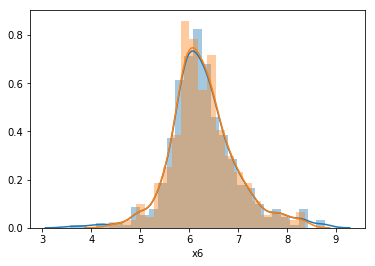

In [77]:
sns.distplot(df['x6'])

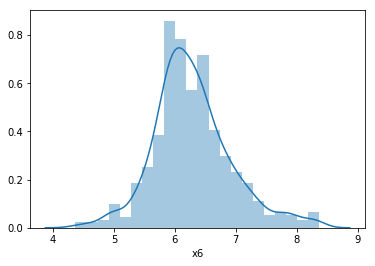

In [75]:
sns.distplot(df2['x6'])

In [79]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [80]:
_df = df
for col in cols: 
    #3σ法の上下限値を設定
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    #条件で絞り込み
    _df = _df[(_df[col] > low) & (_df[col] < high)]

In [84]:
len(df)

506

In [85]:
len(_df) #20%くらいへった。（変数の数が14個 * 0.3%、正規分布ではなかった。）

415

サンプルが減る場合の対処法
- 外れ値は取り除く場合
- 外れ値を平均値もしくは中央値などで埋める
- 主成分分析等を使って、潜在変数に変換した後に3σ法を適用 <- 高度

# 入力変数と出力変数に分割

In [86]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [88]:
#df.iloc[行,列]
X = _df.iloc[:, :-1]
y = _df.iloc[:, -1]

In [90]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# 重回帰分析

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
# モデルを宣言
model = LinearRegression()

In [102]:
#モデルの学習
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
# 検証←訓練データ
model.score(X_train, y_train)

0.7972109224535133

In [104]:
#検証←検証データ
model.score(X_test, y_test)

0.625377600432959

In [105]:
# 過学習(オーバーフィッティング) 訓練データと検証データのスコアの差が広い

# スケーリング

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
# scalerの宣言
scaler = StandardScaler()

In [109]:
# scalerの学習←平均と標準偏差を計算
scaler.fit(X_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
# モデルの宣言
model = LinearRegression()

In [116]:
model.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
model.score(X_test2, y_test)

0.6253776004329595

In [120]:
# 重みの確認
model.coef_

array([-0.195,  0.212,  0.508, -0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])

In [119]:
np.set_printoptions(precision=3, suppress=True)#指数関数での表示が禁止

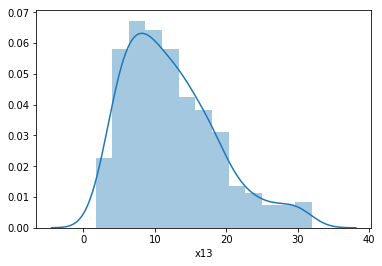

In [124]:
sns.distplot(_df['x13'])